## Scraping Table From Wikipedia

In [57]:
from bs4 import BeautifulSoup
import requests
import numpy as np

In [58]:
page = requests.get('https://en.wikipedia.org/wiki/List_of_Solar_System_objects_by_size')
soup = BeautifulSoup(page.text, 'html')

### Find first \<table\> in the soup

In [59]:
table = soup.find_all('table')[1]

### Parse Headers

In [60]:
html_headers = table.find_all('th')
all_headers = [title.text.strip() for title in html_headers]
all_headers

['Body[note 1]',
 'Image',
 'Radius[note 2]',
 'Volume',
 'Mass',
 'Surface area',
 'Density',
 'Gravity[note 3]',
 'Type',
 'Discovery',
 '(km)',
 '(R🜨)',
 '(109\xa0km3)',
 '(V🜨)',
 '(1021\xa0kg)',
 '(M🜨)',
 '(106 km2)',
 '🜨',
 '(g/cm3)',
 '(m/s2)',
 '(🜨)',
 '695508 ±\xa0?[13]',
 '1989100000[13]',
 '1.409[13]',
 '69911±6[14]',
 '1898187±88[14]',
 '1.3262±0.0003[14]',
 '58232±6[14](136775 for A Ring)',
 '568317±13[14]',
 '0.6871±0.0002[14]',
 '25362±7[14]',
 '86813±4[14]',
 '1.270±0.001[14]',
 '24622±19[14]',
 '102413±5[14]',
 '1.638±0.004[14]',
 '6371.0084±0.0001[14]',
 '5972.4±0.3[14]',
 '5.5136±0.0003[14]',
 '6052±1[14]',
 '4867.5±0.2[14]',
 '5.243±0.003[14]',
 '3389.5±0.2[14]',
 '641.71±0.03[14]',
 '3.9341±0.0007[14]',
 '2634.1±0.3',
 '148.2',
 '1.936',
 '2574.73±0.09[23]',
 '134.5',
 '1.880±0.004',
 '2439.4±0.1[14]',
 '330.11±0.02[14]',
 '5.4291±0.007[14]',
 '2410.3±1.5[23]',
 '107.6',
 '1.834±0.003',
 '1821.6±0.5[5]',
 '89.32',
 '3.528±0.006',
 '1737.5±0.1[28]',
 '73.46[29]',
 '3

I will remove the Earth-based metrics columns, since we can calculate that based on Earth's data.

In [61]:

table_headers = all_headers[:10]
table_headers.remove('Image')
table_headers[0] = "Body"
table_headers[1] = "Radius"
table_headers[6] = "Gravity"
table_headers

['Body',
 'Radius',
 'Volume',
 'Mass',
 'Surface area',
 'Density',
 'Gravity',
 'Type',
 'Discovery']

### Parse Data

Some data in rows are marked as \<th\>

In [62]:
table_data_rows = table.find_all('tr')[2:]
data = []

for row in table_data_rows:
    table_row_data = row.find_all(['td', 'th'])
    row_data = [data.text.strip() for data in table_row_data]

    data.append(row_data)

data

[['Sun',
  '',
  '695508 ±\xa0?[13]',
  '109.2[13]',
  '1,409,300,000[13]',
  '1,301,000[13]',
  '1989100000[13]',
  '333,000[13]',
  '6,078,700[13]',
  '11,918[13]',
  '1.409[13]',
  '274.0[13]',
  '27.94[13]',
  'G2V-class star',
  'prehistoric'],
 ['Jupiter',
  '',
  '69911±6[14]',
  '10.97',
  '1,431,280',
  '1,321',
  '1898187±88[14]',
  '317.83',
  '61,419[15]',
  '120.41',
  '1.3262±0.0003[14]',
  '24.79[14]',
  '2.528',
  'gas giant planet; has rings',
  'prehistoric'],
 ['Saturn',
  '',
  '58232±6[14](136775 for A Ring)',
  '9.140',
  '827,130',
  '764',
  '568317±13[14]',
  '95.162',
  '42,612[16]',
  '83.54',
  '0.6871±0.0002[14]',
  '10.44[14]',
  '1.065',
  'gas giant planet; has rings',
  'prehistoric'],
 ['Uranus',
  '',
  '25362±7[14]',
  '3.981',
  '68,340',
  '63.1',
  '86813±4[14]',
  '14.536',
  '8083.1[17]',
  '15.85',
  '1.270±0.001[14]',
  '8.87[14]',
  '0.886',
  'ice giant planet; has rings',
  '1781'],
 ['Neptune',
  '',
  '24622±19[14]',
  '3.865',
  '62,540'

### Analyse Data

In [63]:
import pandas as pd

In [64]:
matrix = np.matrix(data)
df = pd.DataFrame(matrix)

df = df.drop([1,3,5,7,9,12], axis=1)
df.columns = table_headers

In [65]:
df.head()

,Body,Radius,Volume,Mass,Surface area,Density,Gravity,Type,Discovery
0,Sun,695508 ± ?[13],"1,409,300,000[13]",1989100000[13],"6,078,700[13]",1.409[13],274.0[13],G2V-class star,prehistoric
1,Jupiter,69911±6[14],"1,431,280",1898187±88[14],"61,419[15]",1.3262±0.0003[14],24.79[14],gas giant planet; has rings,prehistoric
2,Saturn,58232±6[14](136775 for A Ring),"827,130",568317±13[14],"42,612[16]",0.6871±0.0002[14],10.44[14],gas giant planet; has rings,prehistoric
3,Uranus,25362±7[14],"68,340",86813±4[14],8083.1[17],1.270±0.001[14],8.87[14],ice giant planet; has rings,1781
4,Neptune,24622±19[14],"62,540",102413±5[14],7618.3[18],1.638±0.004[14],11.15[14],ice giant planet; has rings,1846


Data cleaning and parsing

In [66]:
def clean_strings(data):
    return (data.strip()
            .split("±")[0]
            .split("+")[0]
            .split("[")[0]
            .split("(")[0]
            .replace(",", "")
            .replace("≈", "")
            )

df = df.map(clean_strings)
df[["Radius", "Volume", "Mass", "Surface area", "Density", "Gravity"]] = df[["Radius", "Volume", "Mass", "Surface area", "Density", "Gravity"]].apply(pd.to_numeric, errors='coerce')

df.head()

,Body,Radius,Volume,Mass,Surface area,Density,Gravity,Type,Discovery
0,Sun,695508.0,1.409300e+09,1.989100e+09,6078700.0,1.4090,274.00,G2V-class star,prehistoric
1,Jupiter,69911.0,1.431280e+06,1.898187e+06,61419.0,1.3262,24.79,gas giant planet; has rings,prehistoric
2,Saturn,58232.0,8.271300e+05,5.683170e+05,42612.0,0.6871,10.44,gas giant planet; has rings,prehistoric
3,Uranus,25362.0,6.834000e+04,8.681300e+04,8083.1,1.2700,8.87,ice giant planet; has rings,1781
4,Neptune,24622.0,6.254000e+04,1.024130e+05,7618.3,1.6380,11.15,ice giant planet; has rings,1846


Save to csv

In [67]:
df.to_csv("./DataFrames/SolarSystemBigObjects2023.csv")

### Visualizing data

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
df

,Body,Radius,Volume,Mass,Surface area,Density,Gravity,Type,Discovery
0,Sun,695508.0000,1.409300e+09,1.989100e+09,6.078700e+06,1.4090,274.00000,G2V-class star,prehistoric
1,Jupiter,69911.0000,1.431280e+06,1.898187e+06,6.141900e+04,1.3262,24.79000,gas giant planet; has rings,prehistoric
2,Saturn,58232.0000,8.271300e+05,5.683170e+05,4.261200e+04,0.6871,10.44000,gas giant planet; has rings,prehistoric
3,Uranus,25362.0000,6.834000e+04,8.681300e+04,8.083100e+03,1.2700,8.87000,ice giant planet; has rings,1781
4,Neptune,24622.0000,6.254000e+04,1.024130e+05,7.618300e+03,1.6380,11.15000,ice giant planet; has rings,1846
5,Earth,6371.0084,1.083210e+03,5.972400e+03,5.100645e+02,5.5136,9.81000,terrestrial planet,prehistoric
6,Venus,6052.0000,9.284300e+02,4.867500e+03,4.602000e+02,5.2430,8.87000,terrestrial planet,prehistoric
7,Mars,3389.5000,1.631800e+02,6.417100e+02,1.443700e+02,3.9341,3.71000,terrestrial planet,prehistoric
8,GanymedeJupiter III,2634.1000,7.630000e+01,1.482000e+02,8.699900e+01,1.9360,1.42800,moon of Jupiter,1610
9,TitanSaturn VI,2574.7300,7.150000e+01,1.345000e+02,8.330540e+01,1.8800,1.35400,moon of Saturn,1655


### Scales: 
- Radius: <b>km</b>
- Volume: <b>10<sup>9</sup> km<sup>3</sup></b>
- Mass: <b>10<sup>21</sup> kg</b>
- Surface Area: <b>10<sup>6</sup> km<sup>2</sup></b>
- Density: <b>g/cm<sup>3</sup></b>
- Gravity: <b>m/s<sup>2</sup></b>

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Body          36 non-null     object 
 1   Radius        36 non-null     float64
 2   Volume        36 non-null     float64
 3   Mass          33 non-null     float64
 4   Surface area  32 non-null     float64
 5   Density       33 non-null     float64
 6   Gravity       34 non-null     float64
 7   Type          36 non-null     object 
 8   Discovery     36 non-null     object 
dtypes: float64(6), object(3)
memory usage: 2.7+ KB


In [71]:
df.describe()

,Radius,Volume,Mass,Surface area,Density,Gravity
count,36.000000,3.600000e+01,3.300000e+01,3.200000e+01,33.000000,34.000000
mean,25532.259400,3.921366e+07,6.035661e+07,1.937534e+05,2.185003,10.909236
std,115872.504906,2.348721e+08,3.462435e+08,1.073959e+06,1.252099,46.766561
min,400.000000,2.681000e-01,4.920000e-01,2.850000e+00,0.687100,0.145000
25%,583.250000,8.310000e-01,1.586000e+00,5.988250e+00,1.409000,0.282000
50%,980.500000,4.325000e+00,1.660000e+01,2.040400e+01,1.720000,0.701000
75%,2589.572500,7.270000e+01,3.301100e+02,1.013417e+02,2.170000,3.224250
max,695508.000000,1.409300e+09,1.989100e+09,6.078700e+06,5.513600,274.000000


<Axes: >

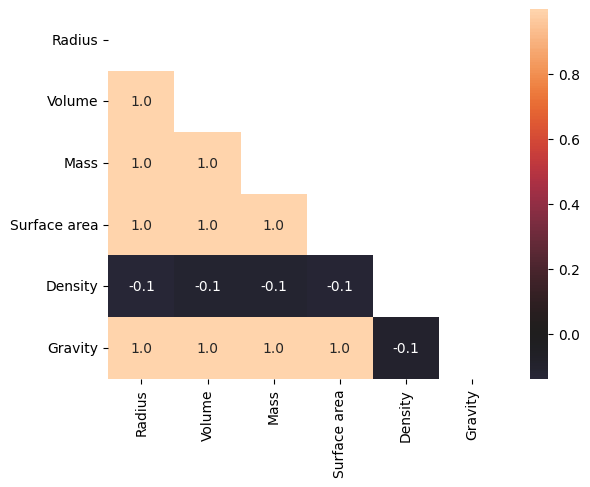

In [72]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", center=0)

Most columns are highly correlated since they are direclty proportional measures

Text(0.5, 1.0, "Planets' radius compared to the Sun")

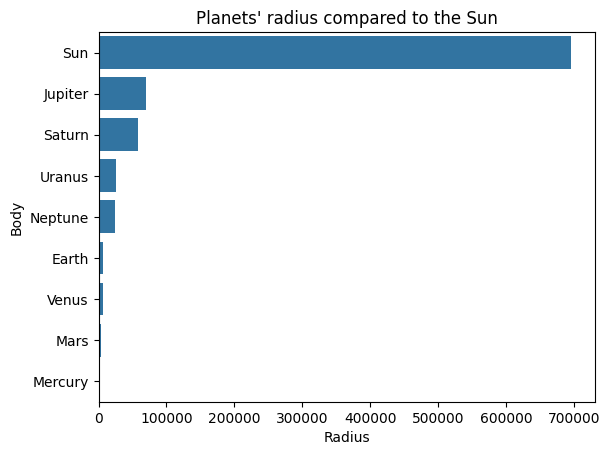

In [73]:
sns.barplot(data=pd.concat([df[:8], df[10:11]]), x="Radius", y="Body")
plt.title("Planets' radius compared to the Sun")

#### Planets and their moons

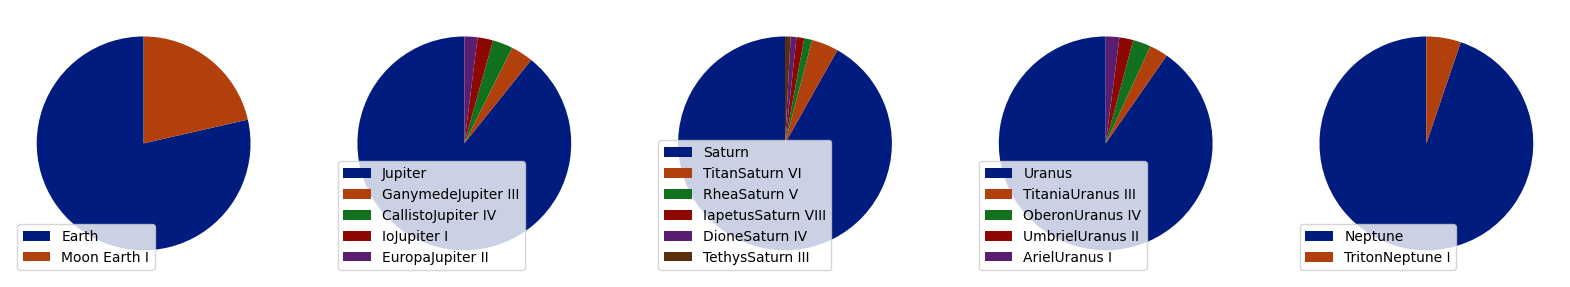

In [74]:

def get_moon_data(planet_name):
    return df[(df.Type.str.contains("moon of " + planet_name)) | (df.Body == planet_name)]

colors=sns.color_palette("dark")

fig, ax = plt.subplots(1, 5, figsize=(20,10))

ax[0].pie(data=get_moon_data("Earth"), x="Radius", colors=colors, startangle=90)
ax[0].legend(get_moon_data("Earth").Body, loc="lower left")

ax[1].pie(data=get_moon_data("Jupiter"), x="Radius", colors=colors, startangle=90)
ax[1].legend(get_moon_data("Jupiter").Body, loc="lower left")

ax[2].pie(data=get_moon_data("Saturn"), x="Radius", colors=colors, startangle=90)
ax[2].legend(get_moon_data("Saturn").Body, loc="lower left")

ax[3].pie(data=get_moon_data("Uranus"), x="Radius", colors=colors, startangle=90)
ax[3].legend(get_moon_data("Uranus").Body, loc="lower left")

ax[4].pie(data=get_moon_data("Neptune"), x="Radius", colors=colors, startangle=90)
ax[4].legend(get_moon_data("Neptune").Body, loc="lower left")

In [75]:
df2 = df.copy()[1:]

df2.loc[df2.Type.str.contains("giant planet"), "Type"] = "Giant Planet"
df2.loc[df2.Type.str.contains("terrestrial planet"), "Type"] = "Planet"
df2.loc[df2.Type.str.contains("dwarf planet"), "Type"] = "Dwarf Planet"
df2.loc[df2.Type.str.contains("moon"), "Type"] = "Moon"
df2.loc[~(df.Type.str.contains("moon")) & ~(df.Type.str.contains("planet")), "Type"] = "Other"

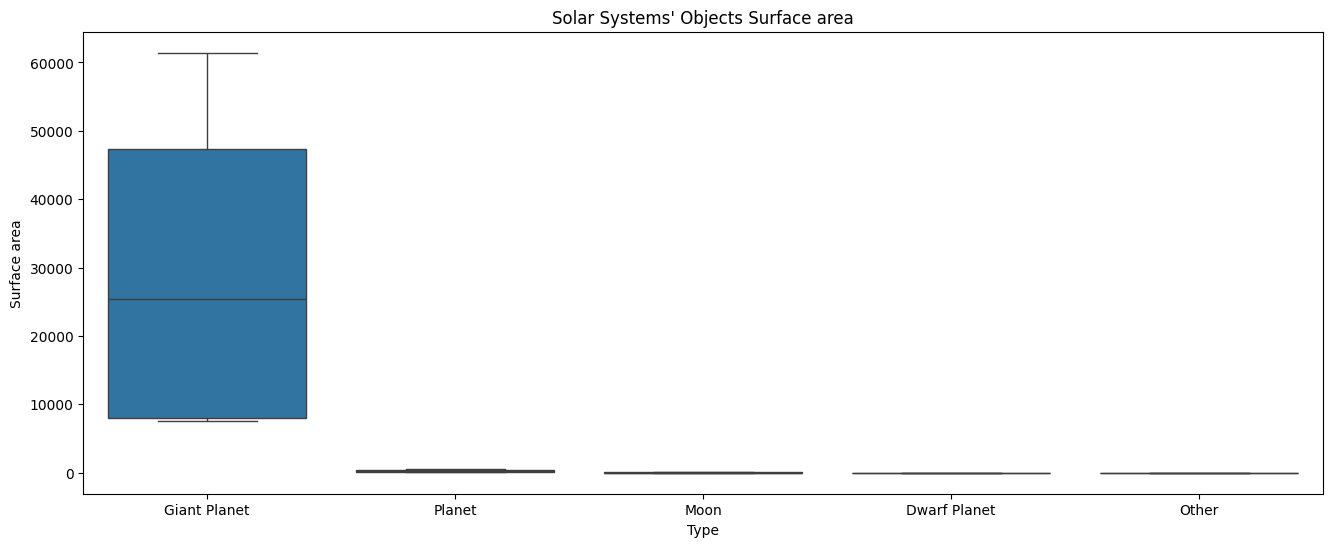

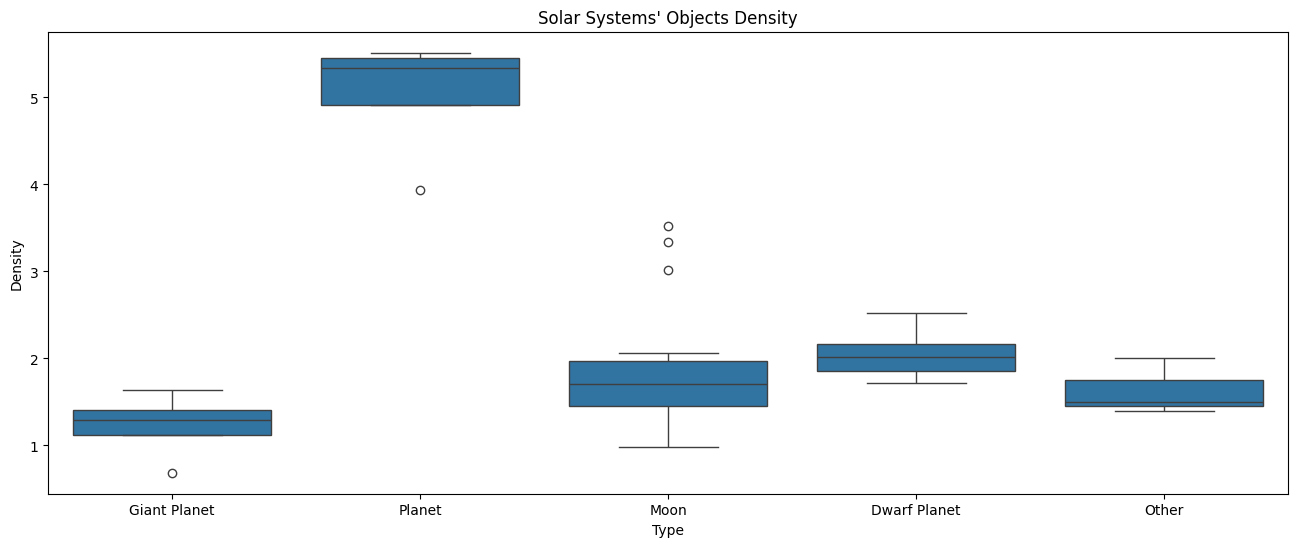

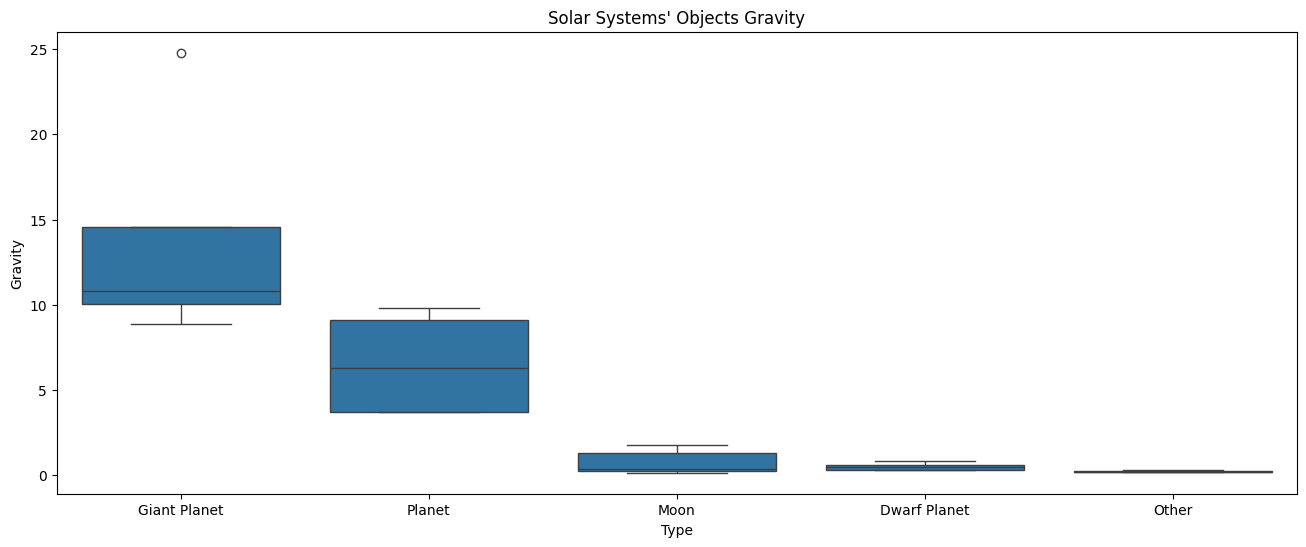

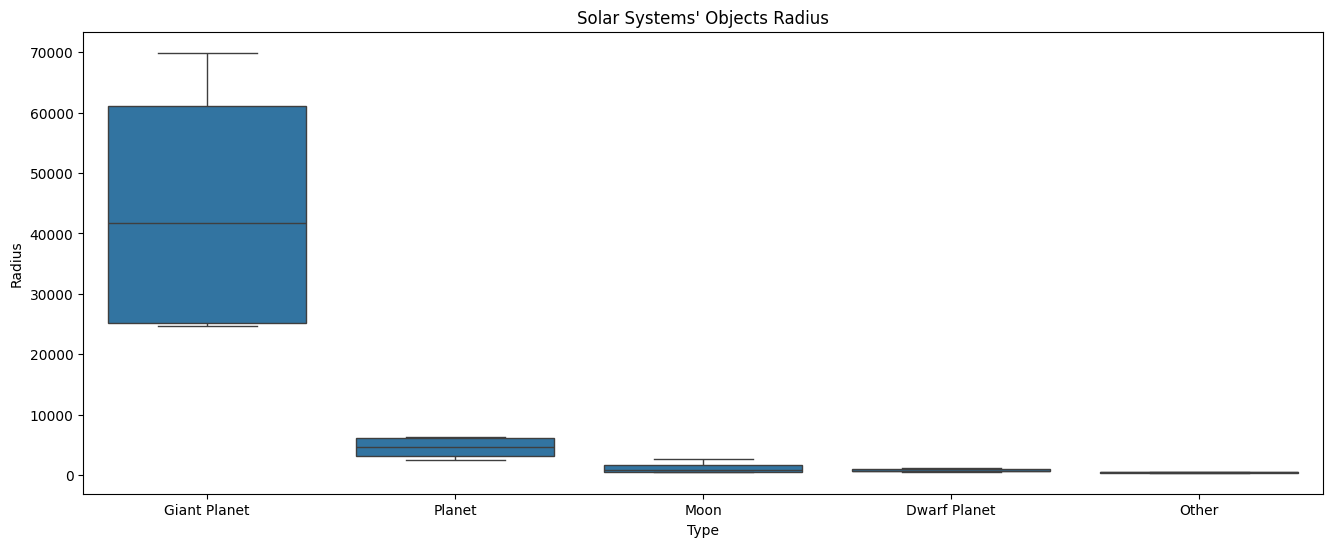

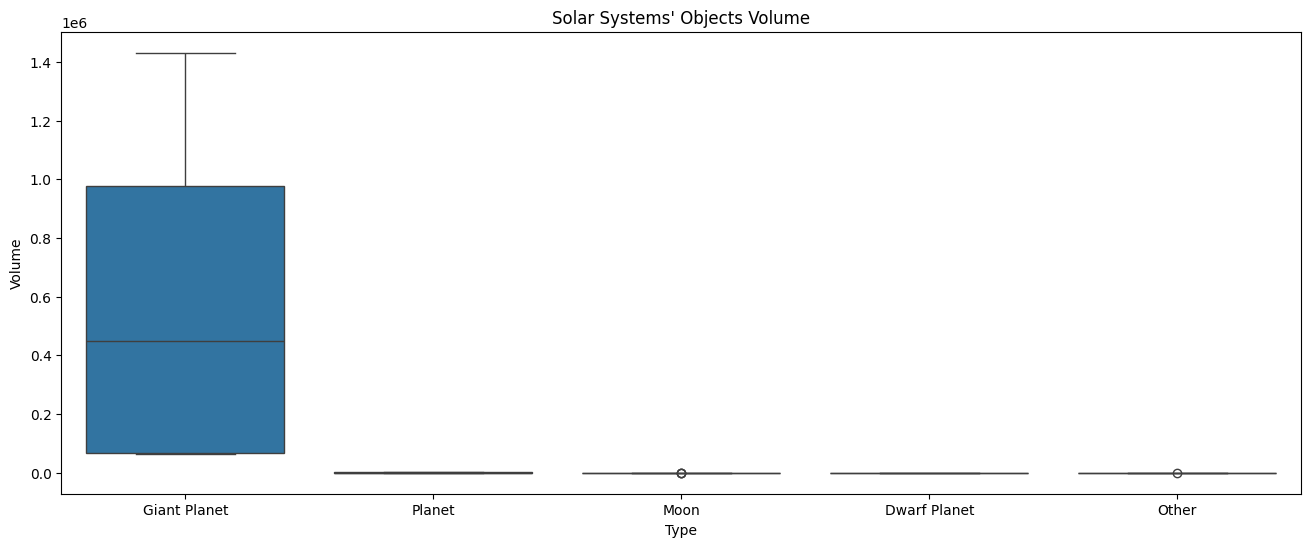

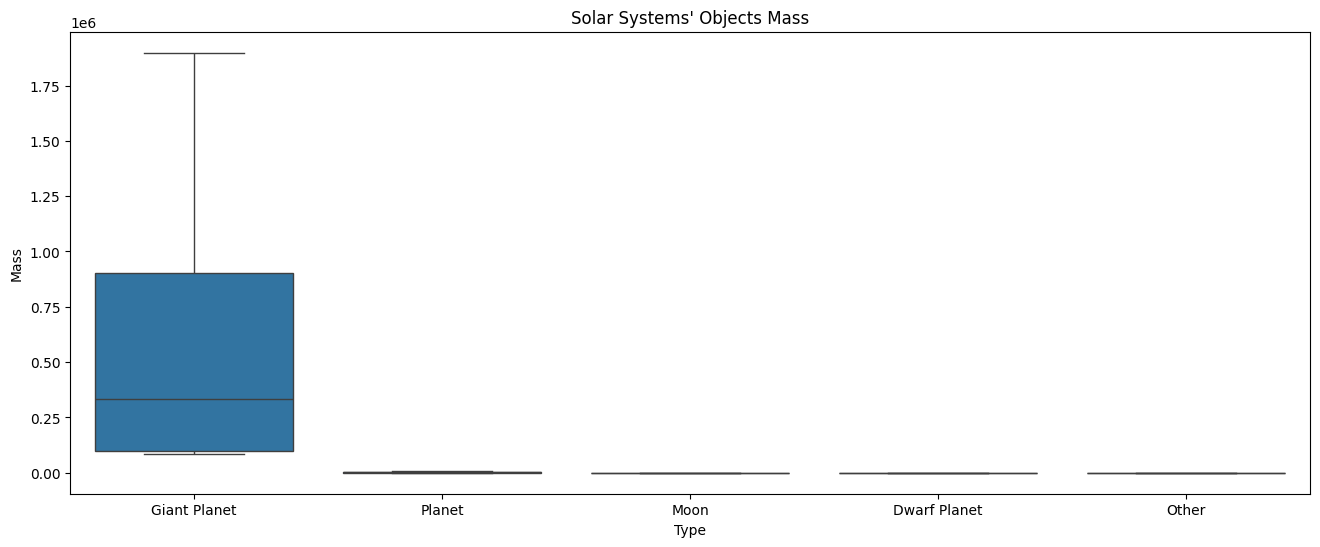

In [77]:
for category in ["Surface area", "Density", "Gravity", "Radius", "Volume", "Mass"]:
    plt.figure(figsize=(16,6))
    sns.boxplot(data=df2, x="Type", y=category)
    plt.title("Solar Systems' Objects " + category)
    plt.show()